In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import * 
from sklearn.preprocessing import LabelEncoder

In [4]:
def print_metrics(y_test,y_pred):
    print('MSE: ',mean_squared_error(y_test,y_pred))
    print()
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print()
    print('MAE: ',mean_absolute_error(y_test,y_pred))
    print()
    print('R2 Score: ',r2_score(y_test,y_pred))

In [7]:
pkl_file = open('./JoinedData.pkl','rb')
df = pickle.load(pkl_file)
pkl_file.close()


In [8]:
le = LabelEncoder()

df['Origin'] = le.fit_transform(df['Origin'])
df['Dest'] = le.fit_transform(df['Dest'])

In [9]:
df.dropna(how='any',inplace=True)
df.drop(columns=['FlightDate','date','ArrTime','ArrDel15','CRSArrTime','NearestDepTime'],inplace=True)
df = df[df['ArrDelayMinutes'] > 0]
df = df.apply(pd.to_numeric)
X = df.loc[:, df.columns != 'ArrDelayMinutes']
y = df.loc[:, df.columns == 'ArrDelayMinutes']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [7]:
print(X_test.shape)
print(y_test.shape)

(175071, 23)
(175071, 1)


In [8]:
X_train.dtypes

Year               float64
Quarter            float64
Month              float64
DayofMonth         float64
Origin               int64
Dest                 int64
CRSDepTime         float64
DepTime            float64
DepDelayMinutes    float64
totalSnow_cm       float64
windspeedKmph        int64
DewPointF            int64
cloudcover           int64
precipMM           float64
pressure             int64
WindGustKmph         int64
visibility           int64
weatherCode          int64
tempF                int64
WindChillF           int64
winddirDegree        int64
humidity             int64
time                 int64
dtype: object

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [10]:
lin_reg = LinearRegression(n_jobs=4,normalize=True)

In [11]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)

In [12]:
pickle.dump(lin_reg,open('./TrainedModels/LinearRegressor.pkl','wb'))

In [13]:
y_pred = lin_reg.predict(X_test)

In [14]:
print_metrics(y_test,y_pred)

MSE:  271.87317517813693

RMSE:  16.488577111992925

MAE:  11.23771553918732

R2 Score:  0.9277432264721739


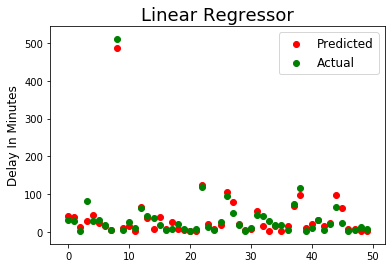

In [15]:
fig,ax1 = plt.subplots()
ax1.scatter(y=y_pred[200:250],x=[i for i in range(50)],c='r',label='Predicted')
ax1.scatter(y=y_test[200:250],x=[i for i in range(50)],c='g',label='Actual')
ax1.legend(fontsize=12)
ax1.set_ylabel('Delay In Minutes',fontsize=12)
ax1.set_title('Linear Regressor',fontsize=18)
plt.savefig('./Images/LinearRegressor.png')
plt.show()

# XGBoost Regressor

In [16]:
import xgboost as xgb

In [17]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, num_parallel_tree=3,learning_rate = 0.5, max_depth = 10,alpha = 10, n_estimators = 10,random_state=42)


In [18]:
xg_reg.fit(X_train,y_train)

[19:51:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, num_parallel_tree=3,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [19]:
pickle.dump(xg_reg,open('./TrainedModels/XGBoostRegressor.pkl','wb'))

In [20]:
y_pred = xg_reg.predict(X_test)

In [21]:
print_metrics(y_test,y_pred)

MSE:  225.32196179488568

RMSE:  15.01072822333699

MAE:  10.182733809831326

R2 Score:  0.9401153204850354


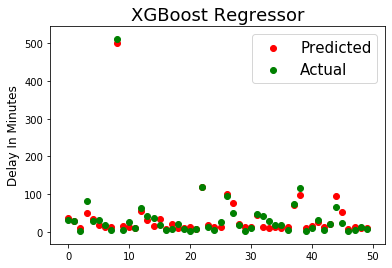

In [22]:
fig,ax2 = plt.subplots()
ax2.scatter(y=y_pred[200:250],x=[i for i in range(50)],c='r',label='Predicted')
ax2.scatter(y=y_test[200:250],x=[i for i in range(50)],c='g',label='Actual')
ax2.legend(fontsize=15)
ax2.set_ylabel('Delay In Minutes',fontsize=12)
ax2.set_title('XGBoost Regressor',fontsize=18)
plt.savefig('./Images/XGBoostRegressor.png')
plt.show()

# Extra Tree Regressor

In [10]:
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
et_reg = ExtraTreesRegressor(n_jobs=4,random_state=42)

In [12]:
et_reg.fit(X_train,y_train)

/home/mahesh/miniconda3/envs/icell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=4, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [13]:
pickle.dump(et_reg,open('./TrainedModels/ExtraTreeRegressor.pkl','wb'))

In [14]:
y_pred = et_reg.predict(X_test)

In [15]:
print_metrics(y_test,y_pred)

MSE:  233.51509226770852

RMSE:  15.281200616041547

MAE:  10.51956509073462

R2 Score:  0.9379378008651951


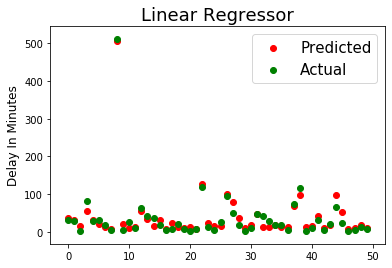

In [16]:
fig,ax3 = plt.subplots()
ax3.scatter(y=y_pred[200:250],x=[i for i in range(50)],c='r',label='Predicted')
ax3.scatter(y=y_test[200:250],x=[i for i in range(50)],c='g',label='Actual')
ax3.legend(fontsize=15)
ax3.set_ylabel('Delay In Minutes',fontsize=12)
ax3.set_title('Linear Regressor',fontsize=18)
plt.savefig('./Images/ExtraTreeRegressor.png')
plt.show()